## Load Data

In [1]:
import pandas as pd
import numpy as np

original_data = pd.read_excel('2017임산물생산조사.xlsx')
original_data.head(3)

,시도/청,시군구/관리소,임가번호,구분(재배/채취),구분(재배/채취).1,구분(재배/채취).2,Unnamed: 6,구분(재배/채취).3,품목,품목.1,품목.2,품목.3,최종값,Unnamed: 13,Unnamed: 14,비고,점검사항,등록자,최초등록일,최종수정일
0,NaN,NaN,NaN,재배채취,재배기준,재배면적,환산면적,재배단위,대분류,중분류,소분류,품목단위,생산량,단가,생산액,NaN,NaN,NaN,NaN,NaN
1,서울특별시,종로구,341235.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,36920,3000,110760000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24
2,서울특별시,중구,341243.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,22720,3000,68160000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24


In [2]:
data = original_data.iloc[1:, [1, 3, 4, 6, 10, 12]]
data.rename(columns={'구분(재배/채취)' : '재배채취',
                     '구분(재배/채취).1' : '재배기준',
                     'Unnamed: 6' : '환산면적',
                     '품목' : '품목 대분류',
                     '품목.1' : '품목 중분류',
                     '품목.2' : '품목 소분류',
                     '최종값' : '생산량'},
            inplace = True)
data.head()

,시군구/관리소,재배채취,재배기준,환산면적,품목 소분류,생산량
1,종로구,채취,NaN,0,은행,36920
2,중구,채취,NaN,0,은행,22720
3,용산구,채취,NaN,0,은행,41440
4,성동구,채취,NaN,0,은행,9960
5,광진구,채취,NaN,0,은행,12800


### Cheack NaNs

In [3]:
data.isnull().sum()

시군구/관리소        0
재배채취         977
재배기준       18752
환산면적           0
품목 소분류         0
생산량            0
dtype: int64

In [4]:
# drop nan's
data.dropna(axis=0, inplace = True)
data.isnull().sum()

시군구/관리소    0
재배채취       0
재배기준       0
환산면적       0
품목 소분류     0
생산량        0
dtype: int64

In [5]:
data.head()

,시군구/관리소,재배채취,재배기준,환산면적,품목 소분류,생산량
8,중랑구,재배,산지,0,두릅,20
16,마포구,재배,노지,0,소나무,45
19,강서구,재배,노지,3966.94,기타관목류,20000
26,서초구,재배,시설,991.736,야생화,4000
27,서초구,재배,시설,991.736,야생화,1000


# variable preprocessing and Visualization
### 시군구/관리소

In [7]:
data['시군구/관리소'].value_counts()

광양시        3659
순천시        3545
홍성군        2354
고창군        2272
산청군        2113
           ... 
영암관리소         1
마포구           1
부여관리소         1
강동구           1
국립산림과학원       1
Name: 시군구/관리소, Length: 199, dtype: int64

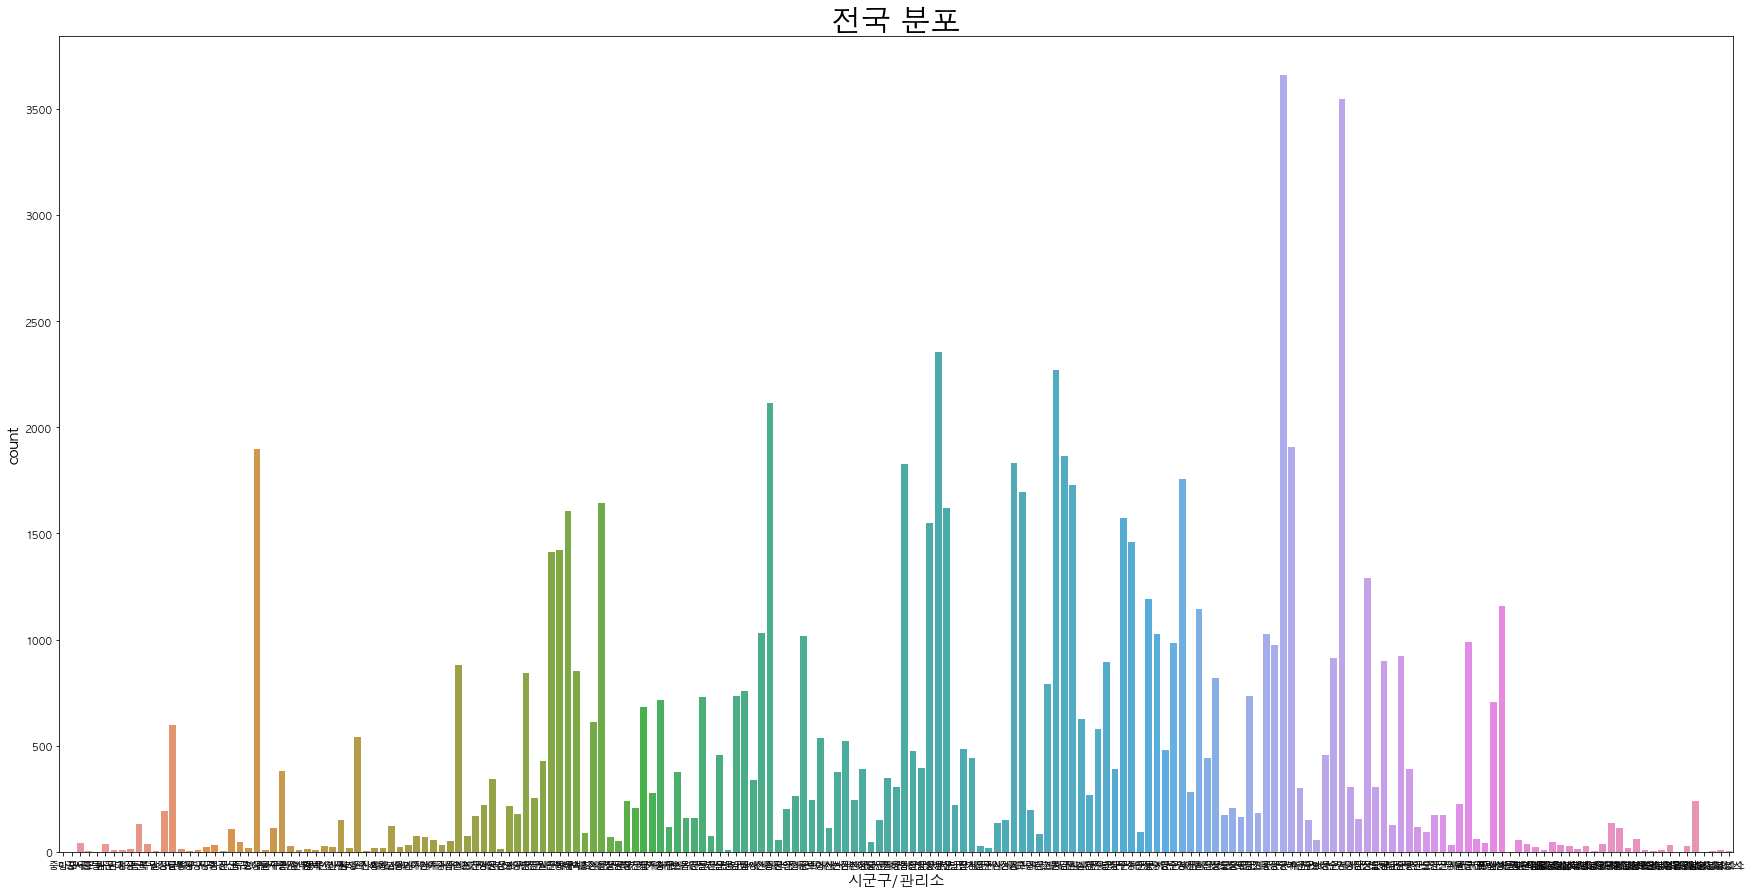

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="시군구/관리소", data=data)
plt.title('전국 분포', fontsize=30)
plt.show()

### 재배채취

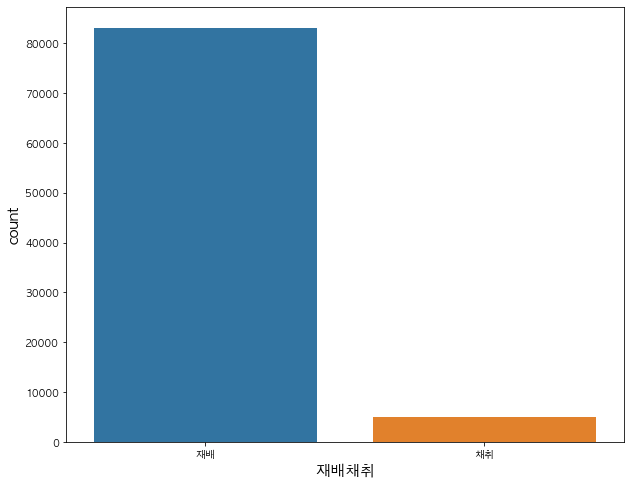

In [9]:
ax = plt.figure(figsize=(10,8))
sns.countplot(x="재배채취", data=data)
plt.show()

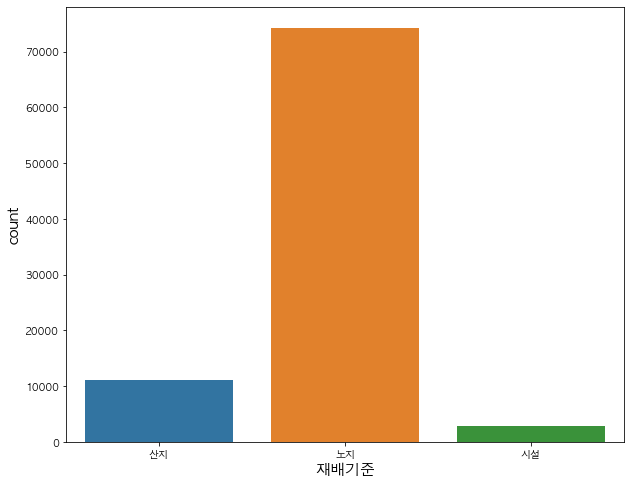

In [10]:
ax = plt.figure(figsize=(10,8))
sns.countplot(x="재배기준", data=data)
plt.show()

### 환산면적

In [11]:
data.replace({'환산면적': {0 : np.NaN}},
             inplace=True)
data.dropna(axis=0, inplace=True)

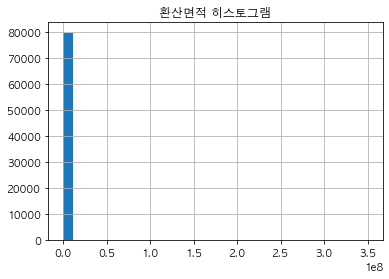

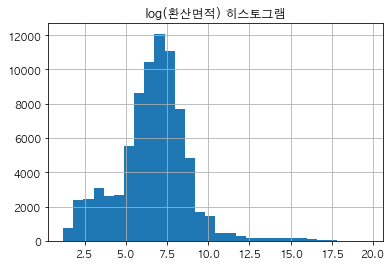

In [12]:
data['환산면적'].hist(bins=30)
plt.title('환산면적 히스토그램')
plt.show()

pd.Series(np.log(data['환산면적'].astype(float))).hist(bins=30)
plt.title('log(환산면적) 히스토그램')
plt.show()

In [13]:
data['환산면적'] = np.log(data['환산면적'].astype(float))
data.head()

,시군구/관리소,재배채취,재배기준,환산면적,품목 소분류,생산량
19,강서구,재배,노지,8.285751,기타관목류,20000
26,서초구,재배,시설,6.899456,야생화,4000
27,서초구,재배,시설,6.899456,야생화,1000
28,서초구,재배,노지,7.410282,기타관목류,15000
31,강동구,재배,시설,8.103429,당귀,6000


### 품목 소분류

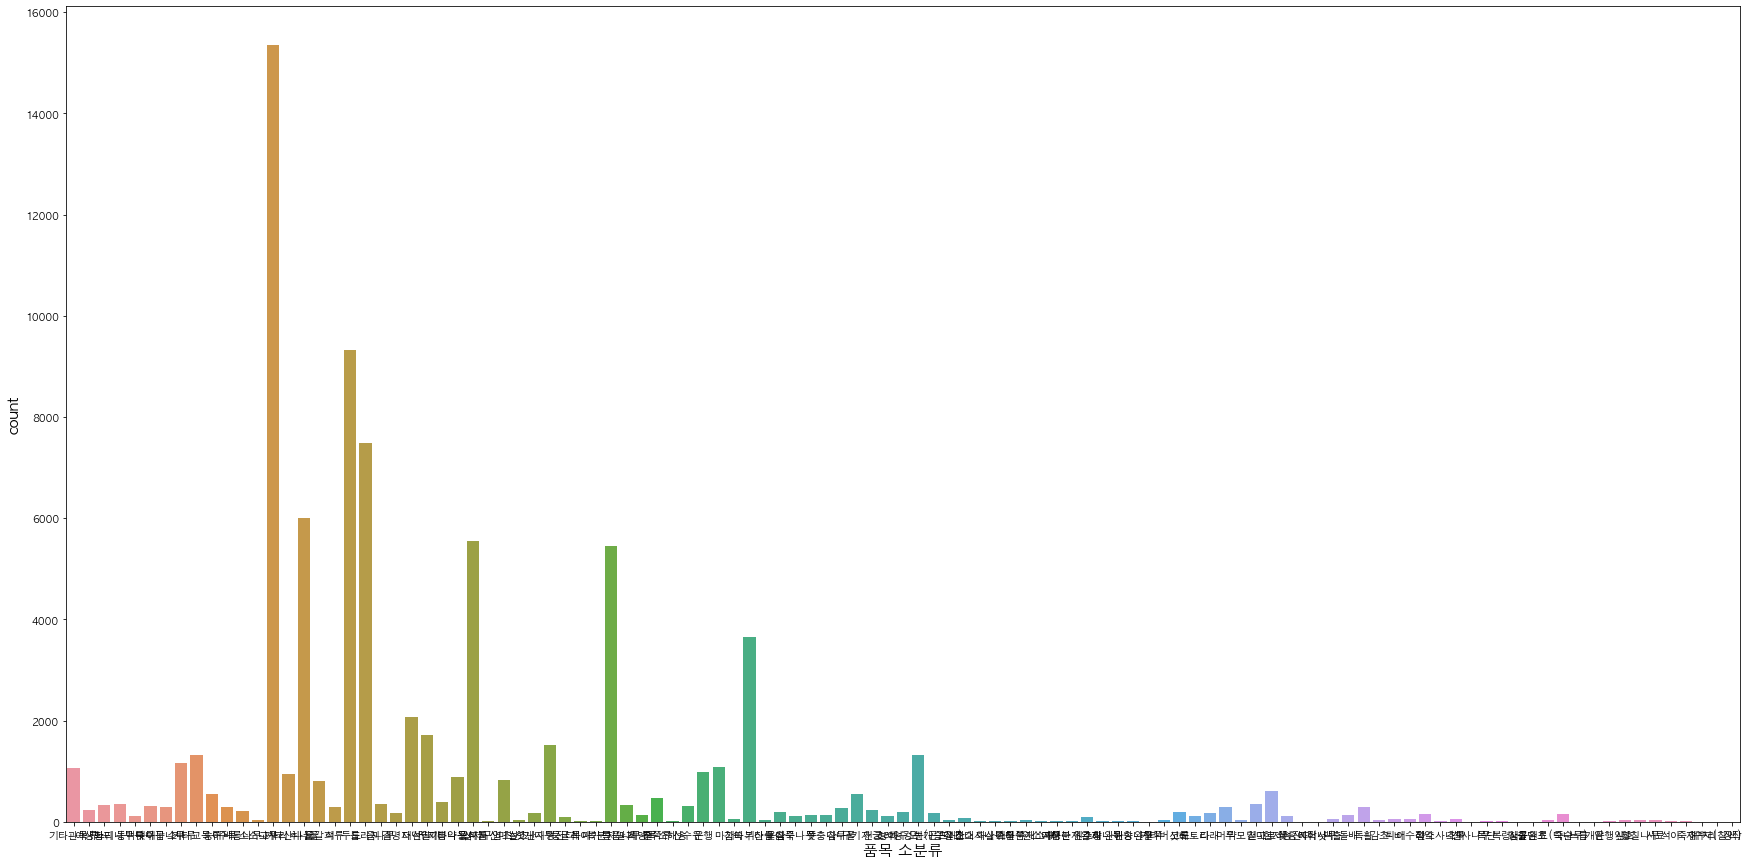

In [14]:
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="품목 소분류", data=data)
plt.show()

### 생산량

In [15]:
data.replace({'생산량': {0 : np.NaN}},
             inplace=True)
data.dropna(axis=0, inplace=True)

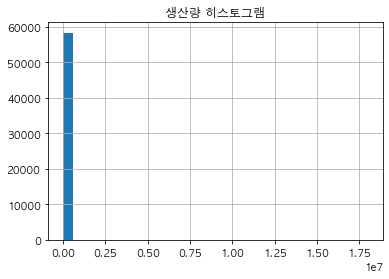

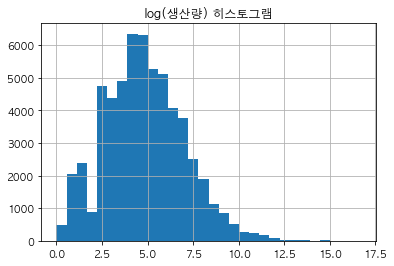

In [16]:
data['생산량'].hist(bins=30)
plt.title('생산량 히스토그램')
plt.show()

pd.Series(np.log(data['생산량'].astype(float))).hist(bins=30)
plt.title('log(생산량) 히스토그램')
plt.show()

In [17]:
data['생산량'] = np.log(data['생산량'].astype(float))
data.head()

,시군구/관리소,재배채취,재배기준,환산면적,품목 소분류,생산량
19,강서구,재배,노지,8.285751,기타관목류,9.903488
26,서초구,재배,시설,6.899456,야생화,8.294050
27,서초구,재배,시설,6.899456,야생화,6.907755
28,서초구,재배,노지,7.410282,기타관목류,9.615805
31,강동구,재배,시설,8.103429,당귀,8.699515


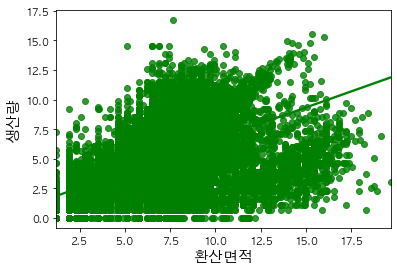

In [18]:
sns.regplot(x='환산면적', y='생산량', data=data, color='g')
plt.show()

## Numerical Variable processing

In [19]:
from sklearn.preprocessing import MinMaxScaler
# column 별로 scaling 되는 것이 아님 주의

X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(data.loc[:, ['환산면적']])
X_scaled = X_minmax_scaler.transform(data.loc[:, ['환산면적']])
X_scaled

array([[0.38370847],
       [0.30868349],
       [0.30868349],
       ...,
       [0.45604941],
       [0.75959607],
       [0.33107602]])

In [20]:
y_minmax_scaler = MinMaxScaler()
y_minmax_scaler.fit(data.loc[:, ['생산량']])
y_scaled = y_minmax_scaler.transform(data.loc[:, ['생산량']])
y_scaled

array([[0.5928144 ],
       [0.4964748 ],
       [0.41349239],
       ...,
       [0.54016966],
       [0.67777647],
       [0.42732655]])

## Categorival variable processing

In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(data.loc[:, ['시군구/관리소', '재배채취', '재배기준', '품목 소분류']])
ordinal = ordinal_encoder.transform(data.loc[:, ['시군구/관리소', '재배채취', '재배기준', '품목 소분류']])
ordinal_encoder.categories_

[array(['가평군', '강동구', '강릉관리소', '강릉시', '강서구', '강진군', '강화군', '거제시', '거창군',
        '경산시', '경주시', '계룡시', '계양구', '고령군', '고성군', '고양시', '고창군', '고흥군',
        '곡성군', '공주시', '과천시', '광산구', '광양시', '광주시', '괴산군', '구례군', '구리시',
        '구미관리소', '구미시', '국립산림과학원', '군산시', '군위군', '금산군', '금정구', '기장군',
        '김제시', '김천시', '김포시', '김해시', '나주시', '남구', '남동구', '남양주시', '남원시',
        '남해군', '논산시', '단양관리소', '단양군', '달성군', '담양군', '당진시', '대덕구', '동구',
        '동두천시', '동해시', '무안군', '무주관리소', '무주군', '문경시', '밀양시', '보령시', '보성군',
        '보은관리소', '보은군', '봉화군', '부안군', '부여군', '부평구', '북구', '사천시', '산청군',
        '삼척관리소', '삼척시', '상주시', '서구', '서귀포시', '서산시', '서천군', '서초구', '성주군',
        '세종시', '속초시', '수성구', '수원관리소', '수원시', '순창군', '순천관리소', '순천시', '시흥시',
        '신안군', '아산시', '안동시', '안산시', '안성시', '안양시', '양구관리소', '양구군', '양산관리소',
        '양산시', '양양관리소', '양양군', '양주시', '양평군', '여수시', '여주시', '영광군', '영덕관리소',
        '영덕군', '영동군', '영암관리소', '영암군', '영양군', '영월관리소', '영월군', '영주관리소',
        '영주시', '영천시', '예산군', '예천군', '오산시', '옥천군', '옹진군', '

In [22]:
ordinal

array([[  4.,   0.,   0.,  10.],
       [ 78.,   0.,   2.,  67.],
       [ 78.,   0.,   2.,  67.],
       ...,
       [167.,   0.,   0.,  38.],
       [167.,   0.,   0.,  71.],
       [167.,   0.,   0.,  85.]])

In [23]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(ordinal)
onehot = onehot_encoder.fit_transform(ordinal)
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 1

In [24]:
numeric_data_df = pd.DataFrame(X_scaled, columns=['환산면적'])
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,환산면적,0,1,2,3,4,5,6,7,8,...,297,298,299,300,301,302,303,304,305,306
0,0.383708,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.308683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.308683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.336329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.373841,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58411,0.343869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58412,0.416715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58413,0.456049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58414,0.759596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_data = np.array(X_data_df)
y_data = y_scaled.reshape(-1,)

print(X_data.shape, y_data.shape)

(58416, 308) (58416,)


## Train Test split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(46732, 308) (11684, 308)
(46732,) (11684,)


# Modeling

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=1000)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [28]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[0.179322   0.26388418 0.23641005 0.26351221 0.34732646 0.37643595
 0.22905786 0.31734127 0.12752003 0.2035928 ]


In [29]:
mean_squared_error(y_test, dt_pred)

0.0068756145745075175

## RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', random_state = 156)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=156)

In [31]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[0.18315158 0.26359225 0.23564954 0.26186763 0.34725814 0.37714393
 0.22805557 0.3171412  0.12738344 0.29969921]


In [32]:
mean_squared_error(y_test, rf_pred)

0.005290876358417528

## Ridge

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [34]:
print(ridge.score(X_train, y_train))

0.6264598622415809


In [35]:
ridge_pred = ridge.predict(X_test)
mean_squared_error(y_test, ridge_pred)

0.0068927122105255445

## LASSO

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [37]:
print(lasso.score(X_train, y_train))

0.47697891186870844


In [38]:
lasso_pred = lasso.predict(X_test)
mean_squared_error(y_test, lasso_pred)

0.009271271609870214

## XGBoost

In [39]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=300)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

[0.1835022  0.26228845 0.2564417  0.34610143 0.34250325 0.37094757
 0.23048708 0.30414617 0.12892142 0.28468436]


In [40]:
mean_squared_error(y_test, xgb_pred)

0.005031506958720842

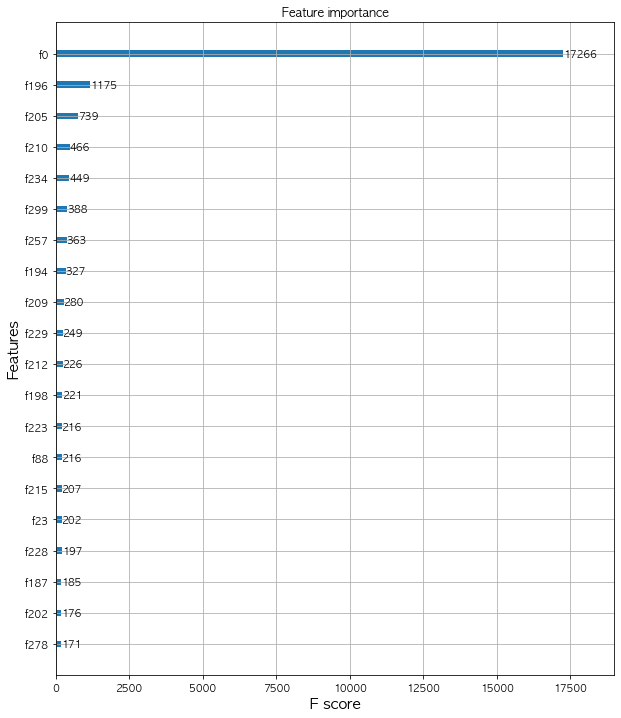

In [41]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [42]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor(n_estimators=500)
lgb_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000,
        verbose = False)

LGBMRegressor(n_estimators=500)

In [43]:
lgb_pred = lgb_reg.predict(X_test)
print(lgb_pred[:10])

[0.17328488 0.25604732 0.25021503 0.31412879 0.34383518 0.37735356
 0.22705632 0.30433092 0.12519496 0.26501142]


In [44]:
print(y_test[:10])

[0.23417039 0.18224254 0.33354443 0.28657521 0.34434414 0.40305575
 0.2756616  0.37200119 0.08298241 0.2756616 ]


In [45]:
mean_squared_error(y_test, lgb_pred)

0.005139136573613373

# Ensemble

In [46]:
import torch
from sklearn.metrics import mean_squared_error

class EnsembleRegressor:
    def __init__(self, models, weights=None):
        
        self.models = models
        self.weights = weights
        
        self.pred_list = []
        
    def predict(self, X_test):
        for model in models.values():
            self.pred_list.append(model.predict(X_test))
        preds = np.array(self.pred_list)
            

        prediction = np.average(preds, axis=0, weights=self.weights)

        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        for model in models.values():
            self.pred_list.append(model.predict(X_test))
        preds = np.array(self.pred_list)

        mse = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            mse_ = mean_squared_error(y_test, prediction)
            mse.append(mse_)
        
        result = pd.DataFrame(weights, columns=['w1', 'w2', 'w3', 'w4'])
        result['MSE'] = mse

        return result.sort_values('MSE', ascending=True)

In [47]:
models = {'RandomForest' : rf, 'Ridge' : ridge, 'XGBOOST': xgb_reg, 'LightGBM' : lgb_reg}

ensemble = EnsembleRegressor(models, weights=None)
result = ensemble.random_search(X_test, y_test, 10000)
result.head(10)

,w1,w2,w3,w4,MSE
3061,0.297064,0.119338,0.292903,0.290695,0.004951
3548,0.291949,0.121003,0.290472,0.296576,0.004952
8862,0.306198,0.119853,0.267394,0.306555,0.004952
6670,0.303664,0.123440,0.311964,0.260932,0.004953
242,0.298340,0.123727,0.314048,0.263885,0.004953
7590,0.315223,0.122793,0.284581,0.277403,0.004953
5376,0.304934,0.124501,0.295128,0.275437,0.004954
6016,0.277692,0.123597,0.302907,0.295804,0.004954
432,0.320063,0.126068,0.273514,0.280354,0.004955
2171,0.283793,0.128015,0.305990,0.282202,0.004956


In [48]:
optimal_weight = result.iloc[0,:-1].tolist()
print(optimal_weight)

[0.2970639169216156, 0.11933799088001251, 0.29290270805358887, 0.2906953692436218]


In [49]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[0.18107393 0.26229242 0.24980813 0.30973825 0.3457096  0.3741986
 0.23577122 0.30737028 0.1254511  0.28025062]


In [50]:
print( y_test[:10])

[0.23417039 0.18224254 0.33354443 0.28657521 0.34434414 0.40305575
 0.2756616  0.37200119 0.08298241 0.2756616 ]


In [51]:
mean_squared_error(y_test, preds)

0.004951333730035045

# Evaluation

In [52]:
inverse_transformed_pred = np.exp(preds * y_minmax_scaler.data_range_ + y_minmax_scaler.data_min_)
inverse_transformed_y_test = np.exp(y_test * y_minmax_scaler.data_range_ + y_minmax_scaler.data_min_)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[ 20.59399937  79.98397368  64.92710295 176.69952532 322.26812158
 518.69587274  51.35520006 169.84594295   8.13171044 107.96789883]
[ 50.  21. 263. 120. 315. 840. 100. 500.   4. 100.]


# Prediction

In [53]:
test_set = pd.read_excel('test_set.xlsx')

test_set.head()

,시도/청,시군구/관리소,임가번호,구분(재배/채취),구분(재배/채취).1,구분(재배/채취).2,Unnamed: 6,구분(재배/채취).3,품목,품목.1,품목.2,품목.3,최종값,Unnamed: 13,Unnamed: 14,비고,점검사항,등록자,최초등록일,최종수정일
0,NaN,NaN,NaN,재배채취,재배기준,재배면적,환산면적,재배단위,대분류,중분류,소분류,품목단위,생산량,단가,생산액,NaN,NaN,NaN,NaN,NaN
1,서울특별시,서초구,38456.0,재배,시설,300,991.736,평,조경재,야생화,야생화,본,4000,1000,4000000,NaN,NaN,A1001P101,2018-04-23,2018-04-23
2,서울특별시,서초구,38456.0,재배,시설,300,991.736,평,조경재,야생화,야생화,본,1000,1200,1200000,NaN,NaN,A1001P101,2018-04-23,2018-04-23
3,서울특별시,서초구,38458.0,재배,노지,500,1652.89,평,조경재,조경수,기타관목류,본,15000,500,7500000,10cm,NaN,A1001P101,2018-04-23,2018-04-23
4,서울특별시,강동구,38274.0,재배,시설,1000,3305.79,평,약용식물,약초,당귀,kg,6000,25000,150000000,NaN,NaN,A1001P101,2018-04-23,2018-04-23


In [56]:
def predict(model, test_set):
    data = test_set.iloc[1:, [1, 3, 4, 6, 10, 12]]
    data.rename(columns={'구분(재배/채취)' : '재배채취',
                         '구분(재배/채취).1' : '재배기준',
                         'Unnamed: 6' : '환산면적',
                         '품목' : '품목 대분류',
                         '품목.1' : '품목 중분류',
                         '품목.2' : '품목 소분류',
                         '최종값' : '생산량'},
                inplace = True)
    
    data.replace({'환산면적': {0 : 1}}, inplace=True)
    data['환산면적'] = np.log(data['환산면적'].astype(float))
    
    # Normalize
    X_scaled = X_minmax_scaler.transform(data.loc[:, ['환산면적']])
    
    # Categorical variable preprocessing
    ordinal = ordinal_encoder.transform(data.loc[:, ['시군구/관리소', '재배채취', '재배기준', '품목 소분류']])
    onehot = onehot_encoder.transform(ordinal)
    
    numeric_data_df = pd.DataFrame(X_scaled, columns=['환산면적'])
    onehot_data_df = pd.DataFrame(onehot.toarray())

    X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
    X_data = np.array(X_data_df)
    
    y_pred = model.predict(X_data)
    inverse_transformed_pred = np.exp(y_pred * y_minmax_scaler.data_range_ + y_minmax_scaler.data_min_)
    
    return inverse_transformed_pred

In [57]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)
predict(ensemble, test_set)

array([3411.17658907, 3411.17658907, 1724.94344677, 2471.7885236 ,
         53.56064553,   89.74202717,   80.03074503,   90.09771175,
         82.93629601,  343.12718165,  662.67558999,   51.90135629,
         42.46607706,   42.91310505,   58.04407405,   40.72632587,
        104.54435935,  104.54435935,  104.54435935,  104.54435935])